# Text Analytics using NLTK

Livro interessante e de acesso livre [aqui](https://nlp.stanford.edu/IR-book/html/htmledition/irbook.html)

# Configurações

In [8]:

import pandas as pd
import numpy as np

# a biblioteca "string" está incluída na instalação base do Python
# pelo que não é necessário colocar explicitamente este "import"
# fica aqui explicito apenas para ser claro no código quando é
# usada
import string

# podemos importar todas as bibliotecas da plataforma NLTK. Mas, atenção: temos de referenciar
# cada biblioteca para utilizarmos as funções aí disponíveis
import nltk

# em alternativa, podemos importar cada uma das bibliotecas incluidas 
# na plataforma NLTK separadamente, desta forma as suas funções ficam expostas diretamente
# no nosso ambiente de programação
import nltk.corpus
import nltk.tokenize

import os
import nltk.corpus

import re


import matplotlib as plt

In [9]:
# Colocar o path correto

path = "C:/.../"

path_projeto_ICD2021 = "TRABALHO_AULAS/AL20212022/ICD_202120221/"

path_dados = path + path_projeto_ICD2021 + "projeto_ICD2021/dados/" 

## Base de dados de textos (Corpus)

In [10]:
# Resumos recolhidos 
search_results_abstracts = pd.read_csv(path_dados+'search_results_abstracts.csv')  
search_results_abstracts['Abstract'] = search_results_abstracts['Abstract'].astype(str)
search_results_abstracts

,Abstract
0,"© 2021 by the authors. Licensee MDPI, Basel, S..."
1,"© 2021, The Author(s).As the COVID-19 pandemic..."
2,© 2021Property valuation contributes significa...
3,"© 2021, Emerald Publishing Limited.Purpose: Re..."
4,"© 2021 by the authors. Licensee MDPI, Basel, S..."
...,...
179,Purpose Available literature claims that locat...
180,"In recent years, engineering geology has been ..."
181,nan
182,This paper presents a literature review of qua...


# 1.Basic preprocessing - Part 1

ATENÇÃO: os processos de pré-processamento aqui descritos podem ser implementados de forma mais sofisticada. A plataforma "NLTK" (que inclui várias bibliotecas dedicadas a diferentes procedimentos) inlcui ferramentas que não só implementam os processos aqui descritos como permitem torná-los mais sofisticados e "inteligentes". Ver em concreto a documentação da biblioteca NLTK Tokenize: https://www.nltk.org/api/nltk.tokenize.html

## 1.1 Remove punctuation

In [11]:
excludelist = string.punctuation + string.digits
table_ = str.maketrans('', '', excludelist)


In [12]:
search_results_abstracts['abstract_clean'] = search_results_abstracts['Abstract'].apply(lambda x: x.translate(table_))

search_results_abstracts[:3]

,Abstract,abstract_clean
0,"© 2021 by the authors. Licensee MDPI, Basel, S...",© by the authors Licensee MDPI Basel Switzerl...
1,"© 2021, The Author(s).As the COVID-19 pandemic...",© The AuthorsAs the COVID pandemic came unexp...
2,© 2021Property valuation contributes significa...,© Property valuation contributes significantly...


## 1.2 Remove numbers and special symbols

In [13]:
search_results_abstracts['abstract_clean'] = search_results_abstracts['abstract_clean'].apply(lambda x: re.sub(r"[^a-zA-Z]"," ",x))

search_results_abstracts[:3]

,Abstract,abstract_clean
0,"© 2021 by the authors. Licensee MDPI, Basel, S...",by the authors Licensee MDPI Basel Switzerl...
1,"© 2021, The Author(s).As the COVID-19 pandemic...",The AuthorsAs the COVID pandemic came unexp...
2,© 2021Property valuation contributes significa...,Property valuation contributes significantly...


## 1.3 Eliminar maiusculas

In [14]:
search_results_abstracts['abstract_clean'] = search_results_abstracts['abstract_clean'].apply(lambda x: x.lower())

search_results_abstracts[:3]

,Abstract,abstract_clean
0,"© 2021 by the authors. Licensee MDPI, Basel, S...",by the authors licensee mdpi basel switzerl...
1,"© 2021, The Author(s).As the COVID-19 pandemic...",the authorsas the covid pandemic came unexp...
2,© 2021Property valuation contributes significa...,property valuation contributes significantly...


## 1.4.Eliminar "StopWord"

In [15]:
#transformar cada resumo numa lista de palavras e guardar essa lista numa nova coluna do nosso data.frame
search_results_abstracts['abstract_clean2'] = search_results_abstracts['abstract_clean'].apply(lambda x: x.split() )
search_results_abstracts['abstract_clean2'] [:3]


0    [by, the, authors, licensee, mdpi, basel, swit...
1    [the, authorsas, the, covid, pandemic, came, u...
2    [property, valuation, contributes, significant...
Name: abstract_clean2, dtype: object

In [16]:
# aplicar a função
stopwords = set(nltk.corpus.stopwords.words('english') )
search_results_abstracts['abstract_clean3'] = search_results_abstracts['abstract_clean2'].apply(lambda x: list(filter(lambda y: y not in stopwords, x)) )
(search_results_abstracts['abstract_clean3'] [:3])

0    [authors, licensee, mdpi, basel, switzerlandth...
1    [authorsas, covid, pandemic, came, unexpectedl...
2    [property, valuation, contributes, significant...
Name: abstract_clean3, dtype: object

# 2.Basic preprocessing - Part 2 (Tokenization - Lexic normalization)
"Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens "
Ver mais informação [aqui](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)

## 2.1 Opção 1: Stemming
"Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes." [ [Ref](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) ]

A plataforma NLTK disponibiliza a biblioteca STEM para realizar estes procedimentos.
Existem, naturalmente, vários algoritmos para aplicar esta ideia. O algoritmo clássico neste procedimento foi desenvolvido por Porter (1980) com base na língua inglesa. O mesmo autor desenvolveu novos algoritmos com a particularidade de se adaptarem a outras línguas; estes algoritmos são conhecidos (e aqui disponibilizados nesta biblioteca) como "snowball". Existem ainda outros algoritmos nesta biblioteca da plataforma NLTK desenvolvidos específicamente para certas línguas (por exemplo o Alemão ou o Árabe)

In [17]:
#vamos aqui utilizar o algoritmo clássico desenvolvido por Porter
stemmer = nltk.stem.PorterStemmer()

search_results_abstracts['abstract_clean4_stemming'] = search_results_abstracts['abstract_clean3'].apply(lambda x: list(map(lambda i: stemmer.stem(x[i]), range(0, len(x)))) )
search_results_abstracts['abstract_clean4_stemming'][:3]



0    [author, license, mdpi, basel, switzerlandth, ...
1    [authorsa, covid, pandem, came, unexpectedli, ...
2    [properti, valuat, contribut, significantli, m...
Name: abstract_clean4_stemming, dtype: object

## 2.2 Opção 2: Lemmatization
" Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun." [ [Ref](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) ]

NOTA: este procedimento requer a utilização de um dicionário, por forma a identificar de forma mais precisa a "raiz" da palavra

### 2.2.1 Wordnet Lemmatizer

In [18]:
 #Download do dicionário (neste caso um dicionário da língua inglesa)
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pauloricardolb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
lemmatizer_1 = nltk.stem.WordNetLemmatizer()

In [20]:
search_results_abstracts['abstract_clean4_lemmat_1'] = search_results_abstracts['abstract_clean3'].apply(lambda x: list(map(lambda i: lemmatizer_1.lemmatize(x[i]), range(0, len(x)))) )
(search_results_abstracts['abstract_clean4_lemmat_1'] [:3])

0    [author, licensee, mdpi, basel, switzerlandthe...
1    [authorsas, covid, pandemic, came, unexpectedl...
2    [property, valuation, contributes, significant...
Name: abstract_clean4_lemmat_1, dtype: object

#### NOTA
O processo de "lemmatization" pode ser mais eficiente se se fornecer à função um "tag" com o tipo de discurso / objeto gramatical - POS-Tagging (não vamos abordar nesta componente prática)

### 2.2.2 spaCy
A plataforma NLTK não é a única para processamento de texto. A biblioteca spaCy é uma das alternativas. Ver em: https://spacy.io/

## 2.3 Frequência de termos
(a partir daqui vamos usar apenas a versão "steammed")

In [21]:
#Criar uma lista única de todos os documentos
import itertools

all_docs = list(itertools.chain.from_iterable((search_results_abstracts['abstract_clean3'] )))
all_docs



['authors',
 'licensee',
 'mdpi',
 'basel',
 'switzerlandthe',
 'accurate',
 'estimation',
 'real',
 'estate',
 'value',
 'helps',
 'development',
 'real',
 'estate',
 'policies',
 'respond',
 'complexities',
 'instability',
 'real',
 'estate',
 'market',
 'previously',
 'statistical',
 'methods',
 'used',
 'estimate',
 'real',
 'estate',
 'value',
 'machine',
 'learning',
 'methods',
 'gained',
 'popularity',
 'predictions',
 'accurate',
 'contrast',
 'existing',
 'studies',
 'use',
 'various',
 'machine',
 'learning',
 'methods',
 'estimate',
 'transactions',
 'list',
 'prices',
 'real',
 'estate',
 'properties',
 'without',
 'separating',
 'building',
 'land',
 'prices',
 'study',
 'estimates',
 'land',
 'price',
 'using',
 'large',
 'amount',
 'landuse',
 'information',
 'obtained',
 'various',
 'landand',
 'buildingrelated',
 'datasets',
 'random',
 'forest',
 'xgboost',
 'methods',
 'used',
 'estimate',
 'land',
 'prices',
 'seoul',
 'south',
 'korea',
 'january',
 'december',
 '

Cálculo de frequência de palavras

In [22]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist

from nltk.probability import FreqDist
fdist = nltk.FreqDist(all_docs)
fdist

FreqDist({'data': 279, 'real': 198, 'estate': 190, 'model': 158, 'models': 130, 'property': 116, 'study': 112, 'valuation': 110, 'methods': 105, 'research': 103, ...})

In [23]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(200)
fdist1

[('data', 279),
 ('real', 198),
 ('estate', 190),
 ('model', 158),
 ('models', 130),
 ('property', 116),
 ('study', 112),
 ('valuation', 110),
 ('methods', 105),
 ('research', 103),
 ('paper', 97),
 ('market', 96),
 ('analysis', 96),
 ('price', 93),
 ('based', 90),
 ('information', 86),
 ('used', 85),
 ('urban', 84),
 ('land', 80),
 ('using', 80),
 ('results', 79),
 ('also', 78),
 ('method', 70),
 ('spatial', 69),
 ('approach', 68),
 ('use', 67),
 ('regression', 67),
 ('residential', 66),
 ('value', 65),
 ('learning', 65),
 ('prices', 65),
 ('values', 60),
 ('process', 54),
 ('machine', 53),
 ('studies', 53),
 ('appraisal', 53),
 ('energy', 53),
 ('system', 51),
 ('proposed', 50),
 ('housing', 50),
 ('different', 48),
 ('algorithms', 48),
 ('development', 45),
 ('important', 44),
 ('properties', 42),
 ('city', 42),
 ('automated', 42),
 ('building', 41),
 ('prediction', 41),
 ('potential', 41),
 ('new', 41),
 ('environmental', 40),
 ('authors', 39),
 ('time', 39),
 ('however', 39),
 ('l

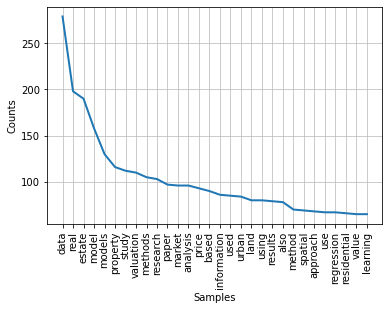

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
# Frequency Distribution Plot
#import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)


## 2.4 Extra: palavras com significado conjunto

In [25]:
from nltk.collocations import BigramCollocationFinder , BigramAssocMeasures
from nltk.corpus import stopwords

stopwords_ = set(stopwords.words('english'))

words = [word.lower() for document in all_docs for word in document.split()
    if len(word) > 2 and word not in stopwords_]

finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
collocations = {bigram: pmi for bigram , pmi in finder.score_ngrams(bgm.mi_like)}

collocations

{('real', 'estate'): 155.02392344497608,
 ('machine', 'learning'): 36.2844702467344,
 ('licensee', 'mdpi'): 9.090909090909092,
 ('mdpi', 'basel'): 9.090909090909092,
 ('mass', 'appraisal'): 6.956546598056032,
 ('taylor', 'francis'): 6.125,
 ('back', 'propagation'): 6.0,
 ('neural', 'networks'): 5.230952380952381,
 ('remote', 'sensing'): 5.142857142857143,
 ('neural', 'network'): 4.891304347826087,
 ('publishing', 'limitedpurpose'): 4.653846153846154,
 ('reggio', 'calabria'): 4.5,
 ('artificial', 'neural'): 4.017857142857143,
 ('analytic', 'hierarchy'): 4.0,
 ('individuation', 'progressive'): 4.0,
 ('nighttime', 'light'): 3.897727272727273,
 ('penalized', 'spline'): 3.4722222222222223,
 ('gradient', 'boosting'): 3.4646464646464645,
 ('emerald', 'publishing'): 3.4128205128205127,
 ('rights', 'reserved'): 3.0625,
 ('particle', 'swarm'): 3.0,
 ('room', 'rates'): 2.6666666666666665,
 ('authors', 'licensee'): 2.5641025641025643,
 ('artificial', 'intelligence'): 2.5510204081632653,
 ('random'

# 3.Representação numérica de texto

Para a representação numérica mais usual do contéudo dos nossos documentos usaremos os recursos da plataforma [scikit-learn](https://scikit-learn.org), em concreto, do seu módulo dedicado ao pré-processamento 

In [26]:
#Preparação dos dados para os adequar aos requisitos (estruturas de dados) do módulo da plataforma scikit-learn a utilizar

search_results_abstracts['abstract_clean4_stemming_texto'] = search_results_abstracts['abstract_clean4_stemming'].apply(lambda x: ' '.join(x))
search_results_abstracts['abstract_clean4_stemming_texto'][:3]

abstract_clean_stemming = np.array(search_results_abstracts['abstract_clean4_stemming_texto'])

## 3.1 Bag of Word (& N-Grams)

### 3.1.1 Termos originais - 1-Gram

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(analyzer='word')

X1 = vectorizer1.fit_transform(abstract_clean_stemming)


In [28]:
df_1Gram = pd.DataFrame(X1.toarray(), columns=vectorizer1.get_feature_names_out())
df_1Gram[:3]

,abil,abiot,abl,abruptli,absolut,absorpt,abund,academ,academia,accept,...,yangtz,year,yet,yield,york,zealand,zillow,zillowcom,zone,zyga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.1.2 Conjuntos de termos vizinhos - N-Grams

In [29]:
vectorizer2 = CountVectorizer(analyzer='word',
                            ngram_range=(2, 2)
                            )

X2 = vectorizer2.fit_transform(abstract_clean_stemming)

In [30]:
df_2Gram = pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names_out())
df_2Gram[:3]

,abil character,abil conclud,abil gener,abil nonlinear,abil standard,abiot natur,abl adapt,abl build,abl consid,abl cope,...,york citi,york region,zealand stretch,zillow develop,zillowcom truliacom,zone cadastr,zone merg,zone prestig,zone urban,zyga publish
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.2 TF-IDF 

A representação assente na contagem (de palavras ou de n-grams) é um bom começo, mas dá igual peso a todos os termos com a mesma frequência. No entanto, alguns termos são mais “interessantes” do que outros, mesmo que tenham mais ou menos o mesmo número de ocorrências.
A representação TF-IDF oferece uma forma de representar esta importância:
A ideia passa por balancear a frequência de um termo num documento (TF) com o número de documentos em que o referido termo ocorre (DF)

In [ ]:
# ver em: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(analyzer='word')

X3 = vectorizer3.fit_transform(abstract_clean_stemming)


In [32]:
df_tfidf = pd.DataFrame(X3.toarray(), columns=vectorizer3.get_feature_names_out())
df_tfidf[:3]

,abil,abiot,abl,abruptli,absolut,absorpt,abund,academ,academia,accept,...,yangtz,year,yet,yield,york,zealand,zillow,zillowcom,zone,zyga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.092992,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer4 = TfidfVectorizer(analyzer='word',
                    min_df=0.001,
                    max_df=0.75,
                    sublinear_tf=True)

X4 = vectorizer4.fit_transform(abstract_clean_stemming)

In [41]:
df_tfidf4 = pd.DataFrame(X4.toarray(), columns=vectorizer4.get_feature_names_out())
df_tfidf4[:3]

,abil,abiot,abl,abruptli,absolut,absorpt,abund,academ,academia,accept,...,yangtz,year,yet,yield,york,zealand,zillow,zillowcom,zone,zyga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.117098,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
idf = vectorizer4.idf_
print(idf)

[4.42859636 5.52720864 3.4477671  ... 5.52720864 4.83406146 5.52720864]


In [40]:
tfidf = X4.sum(axis=0).A1
print(tfidf)

[0.51402972 0.10423456 1.45087691 ... 0.12565235 0.55101715 0.16001922]


# 4.Modelling

In [51]:
from sklearn.decomposition import TruncatedSVD
k = 49

svd = TruncatedSVD(n_components=k)

U = svd.fit_transform(X4)
S = svd.singular_values_
V = svd.components_

In [52]:
print(S)

[4.12310563 3.58305843 1.81236961 1.66531166 1.50844222 1.42685819
 1.38014543 1.32428911 1.28126459 1.27881674 1.26314081 1.25069844
 1.24367776 1.22687522 1.20457498 1.1960645  1.18971058 1.1863791
 1.18341577 1.16017611 1.15701062 1.14905272 1.14263357 1.13930193
 1.12822041 1.12171987 1.11817833 1.11027506 1.105827   1.10334666
 1.09907075 1.09013552 1.08837693 1.07749611 1.07198544 1.06718981
 1.06161625 1.05760975 1.04700315 1.04518263 1.0396924  1.03370399
 1.03197476 1.02491121 1.01820163 1.01679911 1.01293814 1.00488391
 1.00336433]


In [53]:
print(V)

[[-5.07740976e-09  2.10441671e-10  1.16667715e-09 ...  4.39248604e-10
  -3.30351892e-09 -1.07353227e-09]
 [ 1.21189779e-02  1.56169404e-03  3.47317547e-02 ...  2.49314593e-03
   1.43416922e-02  3.38384256e-03]
 [-1.19072890e-02 -5.07248123e-03  6.38584285e-03 ... -7.27231346e-04
   2.40364941e-02  1.67485230e-03]
 ...
 [-4.96192521e-03  3.03111629e-03 -3.70919687e-02 ...  2.59863663e-03
   2.90497392e-02 -9.75217813e-03]
 [-5.97225502e-04  1.58650849e-02  4.61981496e-02 ... -5.22708524e-03
   8.63311241e-03  3.18564976e-03]
 [-1.00231059e-02 -7.06788868e-03 -2.97057734e-02 ...  1.61399768e-02
   3.85559910e-02  2.52818108e-02]]


In [59]:
df_components = pd.DataFrame(V)
df_components.columns = df_tfidf4.columns
df_components[:3]

,abil,abiot,abl,abruptli,absolut,absorpt,abund,academ,academia,accept,...,yangtz,year,yet,yield,york,zealand,zillow,zillowcom,zone,zyga
0,-5.077410e-09,2.104417e-10,1.166677e-09,3.291941e-09,-6.939191e-10,-7.903915e-10,-3.751789e-12,-4.402807e-09,3.187824e-10,-3.306319e-09,...,-1.438845e-09,-1.045557e-08,-6.478638e-09,-3.814471e-09,-1.981565e-10,2.104417e-10,8.744156e-10,4.392486e-10,-3.303519e-09,-1.073532e-09
1,1.211898e-02,1.561694e-03,3.473175e-02,2.443702e-03,1.001735e-02,1.566668e-03,4.442970e-03,1.589023e-02,4.068040e-03,8.927407e-03,...,2.138598e-03,3.656972e-02,1.333234e-02,1.028369e-02,5.958230e-03,1.561694e-03,3.003783e-03,2.493146e-03,1.434169e-02,3.383843e-03
2,-1.190729e-02,-5.072481e-03,6.385843e-03,-2.871225e-03,1.524175e-02,-2.620134e-03,-4.445073e-03,-2.193627e-02,-7.090700e-03,-2.342021e-02,...,-2.010756e-03,-3.040612e-02,-3.097823e-02,-9.003752e-03,1.265483e-03,-5.072481e-03,-4.307962e-03,-7.272313e-04,2.403649e-02,1.674852e-03


In [62]:
nlargest = 10
order = np.argsort(-df_components.values, axis = 1)[: ,: nlargest]
result = pd.DataFrame(df_components.columns[order],
   columns = ['top{}'.format(i) for i in range(1, nlargest + 1)],
   index = df_components.index)

result[:4]

C:\Users\PAULOR~1\AppData\Local\Temp/ipykernel_45836/3601981607.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  result = pd.DataFrame(df_components.columns[order],


,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,nan,learn,involv,investig,featur,research,mass,view,process,cover
1,model,estat,real,data,use,properti,method,price,valuat,market
2,estat,real,algorithm,model,premis,regress,valuat,transact,keel,registri
3,market,calabria,reggio,premium,estat,penal,spline,ag,springer,real
